# Análisis de videojuegos - tienda Ice

# Paso 1

Importar las librerías a usar

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

Cargar el archivo

In [2]:
games = pd.read_csv('games.csv')

Leer el DataFrame para analizar los tipos de datos

# Paso 2. Preparación de los datos

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Cambiar a minúsculas los nombres de las columnas

In [4]:
games.columns = games.columns.str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Columna "name"

In [6]:
valores_ausentes_name = games['name'].isna().sum()
print(f'Hay {valores_ausentes_name} valores ausentes en la columna "name"')

Hay 2 valores ausentes en la columna "name"


In [7]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
print(len(games.query("platform == 'GEN'")))

29


In [9]:
games = games.dropna(subset=['name'])
valores_ausentes_name = games['name'].isna().sum()
print(f'Hay {valores_ausentes_name} valores ausentes en la columna "name"')

Hay 0 valores ausentes en la columna "name"


La columna "name" contiene sólo dos valores ausentes. Al revisar dichas filas, se puede observar que tampoco cuentan valores en las columnas "genre", "critic_score",	"user_score" y "rating", además, las ventas registradas son muy bajas, por lo que no aportarían gran valor para el análisis. Decidí eliminar dichas columnas ya que la información contenida no es de gran relevancia y al ser únicamente 2 columnas, eliminarlas no afecta realmente el análisis posterior.

### Columna "year_of_release"

Convertir los datos de la columna "year_of_release" de float a entero

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
print(games['year_of_release'].head())

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64


In [11]:
valores_ausentes_year_of_release = games['year_of_release'].isna().sum()
print(f'Hay {valores_ausentes_year_of_release} datos ausentes en la columna "years_of_release"')

Hay 269 datos ausentes en la columna "years_of_release"


In [12]:
mean_year_of_release = games['year_of_release'].mean()
median_year_of_release = games['year_of_release'].median()
print(f'La media de los datos de year_of_release es de {mean_year_of_release}, la mediana es de {median_year_of_release}')

La media de los datos de year_of_release es de 2006.4862563853078, la mediana es de 2007.0


In [13]:
games['year_of_release'] = games['year_of_release'].fillna(median_year_of_release)

valores_ausentes_year_of_release = games['year_of_release'].isna().sum()
print(f'Hay {valores_ausentes_year_of_release} datos ausentes en la columna "years_of_release"')

Hay 0 datos ausentes en la columna "years_of_release"


Decidí rellenar los valores ausentes de la columna "years_of_release" con la mediana, ya que la media y la mediana son muy similares, pero escogí la mediana para mantener los valores en tipo entero y no flotante.

### Columna "critic_score"

In [14]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
games['critic_score'].head()

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float64

In [16]:
valores_ausentes_critic_score = games['critic_score'].isna().sum()
print(f'Hay {valores_ausentes_critic_score} valores ausentes en la columna "critic_score')

Hay 8576 valores ausentes en la columna "critic_score


In [17]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
mean_critic_score = games['critic_score'].mean()
median_critic_score = games['critic_score'].median()
print(f'La media de los datos de critic_score es de {mean_critic_score}, la mediana es de {median_critic_score}')

La media de los datos de critic_score es de 68.96767850559173, la mediana es de 71.0


Decidí no rellenar los valores ausentes de la columna "critic_score" con la media o la mediana a pesar de tener valores muy similares. Esto porque más de la mitad del dataset contiene valores ausentes y si se usan más adelante, afectarían el resultado. Así pues, si necesito usar esa columna, puedo utilizar el metodo .notna() para no tomar en cuenta los valores ausentes sin tener que crear otro dataset.

Es posible que los valores ausentes se deban a que no todos los títulos son reseñados, tal vez son antiguos y para ese momento no había plataformas que les asignara una puntuación o no son muy populares.

### Columna "user_score"

Los datos de la columna "user_score" son de tipo object cuando deberían ser float. Esto se debe a que algunos valores tienen la abreviatura TBD. Sustituiré los valores TBD por "NaN" para poder convertirlos a float.

In [19]:
valores_ausentes_user_score = games['user_score'].isna().sum()
print(f'Hay {valores_ausentes_user_score} valores ausentes en la columna user_score')

Hay 6699 valores ausentes en la columna user_score


In [20]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
games['user_score'] = games['user_score'].replace('TBD', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
print(games['user_score'].head())

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64


In [22]:
valores_ausentes_user_score = games['user_score'].isna().sum()
print(f'Hay {valores_ausentes_user_score} valores ausentes en la columna user_score')

Hay 9123 valores ausentes en la columna user_score


In [23]:
mean_user_score = games['user_score'].mean()
median_user_score = games['user_score'].median()
print(f'La media de la columna "user_score" es de {mean_user_score}, mientras que la mediana es de {median_user_score}')

La media de la columna "user_score" es de 7.125046113306983, mientras que la mediana es de 7.5


Decidí no rellenar los valores ausentes de la columna "user_score" con la media o la mediana a pesar de tener valores muy similares. Esto porque más de la mitad del dataset representa valores ausentes y si se usan más adelante, afectarían el resultado. si necesito usar esa columna, puedo utilizar el metodo .notna() para no tomar en cuenta los valores ausentes sin tener que crear otro dataset.

Similar a la columna "critic_score", es posible que los valores ausentes en "user_score" se deba a que no todos los títulos son reseñados, tal vez son antiguos y para ese momento no había plataformas que les asignara una puntuación o no son muy populares.

### Columna "rating"

In [24]:
games['rating'].head()

0      E
1    NaN
2      E
3      E
4    NaN
Name: rating, dtype: object

In [25]:
valores_asuentes_rating = games['rating'].isna().sum()
print(f'Hay {valores_asuentes_rating} valores ausentes en la columna rating')

Hay 6764 valores ausentes en la columna rating


In [26]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
games['rating'] = games['rating'].fillna('Unknown')
valores_asuentes_rating = games['rating'].isna().sum()
print(f'Hay {valores_asuentes_rating} valores ausentes en la columna rating')

Hay 0 valores ausentes en la columna rating


La columna "rating" tiene 6764 valores ausentes, al ser una variable categórica se optó por rellenerla con "Unknown" para no inflar los datos de alguna otra clasificación y para no eliminarlos ya que se perderían demasiados valores.

Similar a las dos columnas anteriores, es posible que los valores ausentes en "rating" se deba a que no todos los títulos son reseñados, tal vez son antiguos y para ese momento no había plataformas que les asignara una puntuación o no son muy populares.

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Revisar valores duplicados

In [29]:
print('Valores duplicados en el dataset "games":', games.duplicated().sum())

Valores duplicados en el dataset "games": 0


Tras estandarizar los tipos de datos y el tratamiento de valores ausentes, se verificó la presencia de duplicados mediante el método. No se detectaron filas completamente repetidas, aunque pueden existir registros del mismo juego en diferentes plataformas, lo cual se considera válido para el análisis.

### Ventas totales

In [30]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [32]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


# Paso 3. Análisis de datos

### Mirar cuántos juegos fueron lanzados en diferentes años.

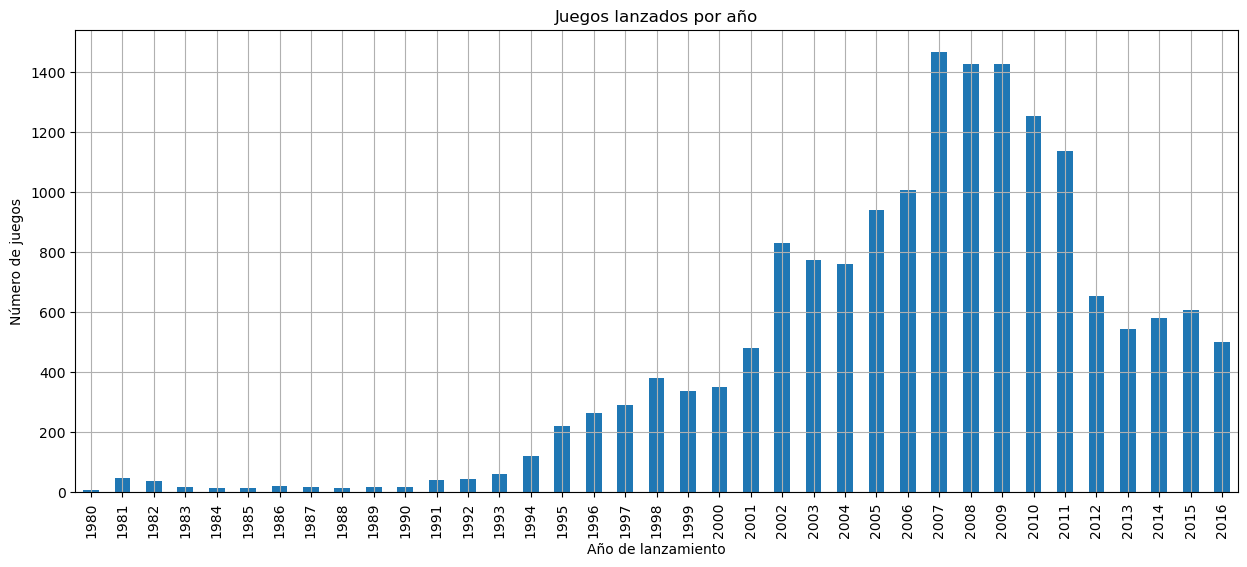

In [33]:
games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title('Juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid()
plt.show()

De 1980 a 2000 podrían no ser tan relevantes los datos porque el número de juegos no llega a 400 de los más de 1400 que se registran. Además, corresponden a generaciones de consolas con dinámicas de mercado distintas.

Convendría analizar del 2005 en adelante dado el visible crecimiento de juegos lanzados en la época. Cabe remarcar que los datos ausentes en la columna del año de lanzamiento fueron rellenados con la mediana (2007), es por ello que la mayor concentración de datos se encuentra en tal año. Sin embargo, en los años posteriores (2008-2009) hay más de 1400 juegos lanzados.

### Variación en las ventas de una plataforma a otra.

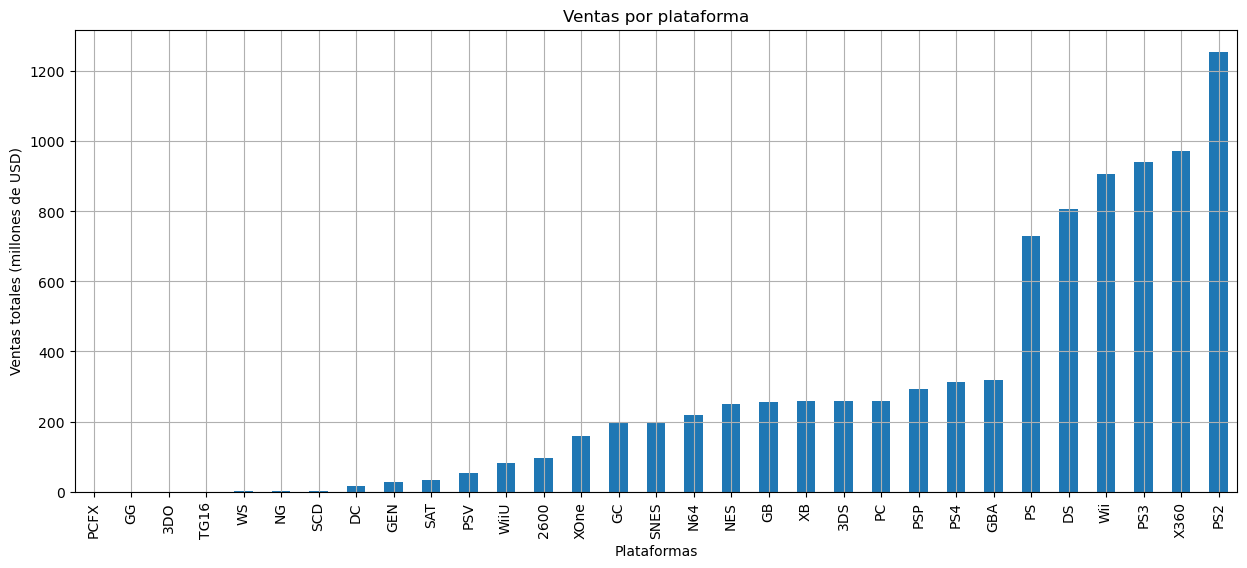

In [34]:
platform_sales = games.groupby('platform')['total_sales'].sum()
platform_sales = platform_sales.sort_values()
platform_sales.plot(kind='bar', figsize=(15, 6))
plt.title('Ventas por plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales (millones de USD)')
plt.grid()
plt.show()

Buscar las plataformas que solían ser populares pero que ahora no tienen ventas.

In [35]:
platform_sales_by_year = (games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index())
recent_sales = (platform_sales_by_year[platform_sales_by_year['year_of_release'] >= 2005].groupby('platform')['total_sales'].sum())
past_sales = (platform_sales_by_year[platform_sales_by_year['year_of_release'] < 2005].groupby('platform')['total_sales'].sum())
recent_sales = recent_sales.reindex(past_sales.index, fill_value=0)

inactive_platforms = past_sales[(past_sales > 0) & (recent_sales == 0)].index
print(inactive_platforms)

Index(['3DO', 'GEN', 'GG', 'NES', 'NG', 'PCFX', 'SAT', 'SCD', 'SNES', 'TG16',
       'WS'],
      dtype='object', name='platform')


In [36]:
lifespans = (platform_sales_by_year.groupby('platform')['year_of_release'].agg(['min', 'max']))
lifespans['duration'] = lifespans['max'] - lifespans['min']
lifespans = lifespans.sort_values('min')
print(lifespans)

           min   max  duration
platform                      
2600      1980  2007        27
NES       1983  1994        11
DS        1985  2013        28
PC        1985  2016        31
GB        1988  2007        19
SNES      1990  1999         9
GEN       1990  1994         4
GG        1992  1992         0
SCD       1993  1994         1
NG        1993  1996         3
SAT       1994  1999         5
PS        1994  2007        13
3DO       1994  1995         1
TG16      1995  1995         0
PCFX      1996  1996         0
N64       1996  2007        11
DC        1998  2008        10
WS        1999  2001         2
GBA       2000  2007         7
XB        2000  2008         8
PS2       2000  2011        11
GC        2001  2007         6
PSP       2004  2015        11
X360      2005  2016        11
PS3       2006  2016        10
Wii       2006  2016        10
3DS       2007  2016         9
PSV       2007  2016         9
WiiU      2012  2016         4
PS4       2013  2016         3
XOne    

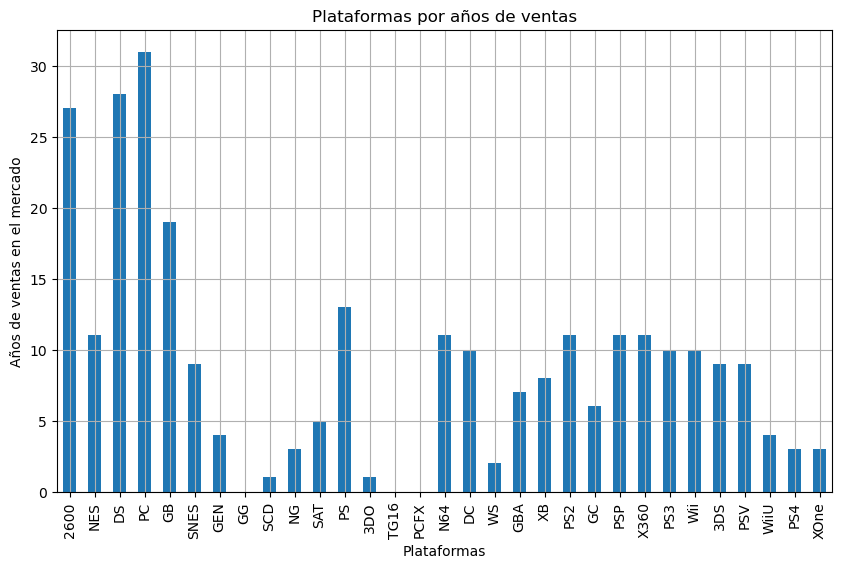

In [37]:
lifespans['duration'].plot(kind='bar', figsize=(10,6))
plt.title('Plataformas por años de ventas')
plt.xlabel('Plataformas')
plt.ylabel('Años de ventas en el mercado')
plt.grid()
plt.show()

En la gráfica se puede observar que hay plataformas que registran ventas desde 1980 por más de 2 décadas, como lo son 2600, PC y DS. Esto quiere decir que se actualizaban frecuentemente o que tenían una base de usuarios sólida.
Las plataformas que solían ser populares pero que ya no registran ventas incluyen NES, SNES, N64, Game Boy, PS1 y Dreamcast, entre otras. Estas consolas dominaron el mercado entre las décadas de 1980 y 2000, pero fueron sustituidas por nuevas generaciones con mayor potencia y soporte técnico.

Por otra parte, hay plataformas que registran muy poca actividad como GG, TG16 o PCFX, es decir, no tuvieron mucho éxito comercial y es por ello que se mantuvieron poco tiempo en el mercado. 

Asimismo, las plataformas más recientes como PS2, X360, Wii, PS3, etc., registran alrededor de 8-12 años de duración en el mercado. Este patrón sugiere que las nuevas plataformas aparecen aproximadamente cada 5–7 años, mientras que las anteriores desaparecen gradualmente en un lapso de 3-5 años después de la llegada de su sucesora.

### Período para trabajar: 2005 en adelante

In [38]:
games_filtered = games[games['year_of_release'] >= 2005]
print(games_filtered.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91  


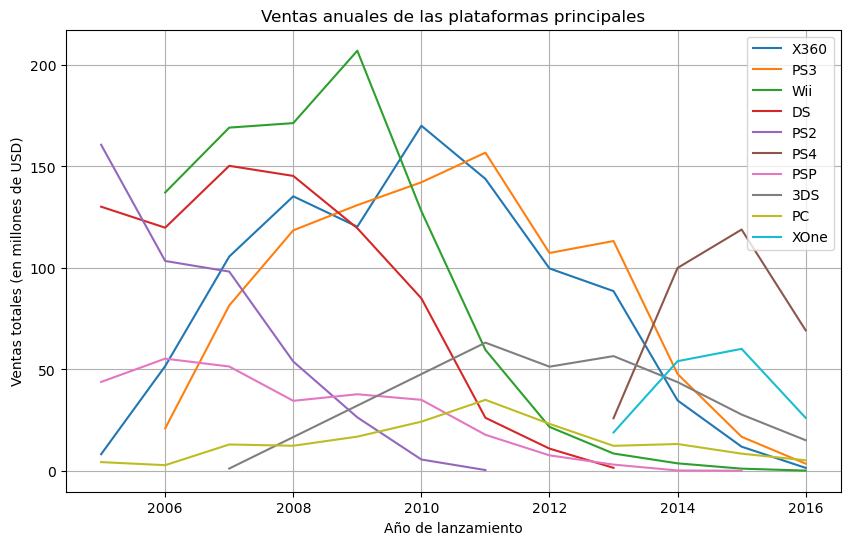

In [39]:
top_platforms = games_filtered.groupby('platform')['total_sales'].sum().nlargest(10).index
for platform in top_platforms:
    platform_data = games_filtered[games_filtered['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    platform_data.plot(kind='line', label=platform, figsize=(10,6))
plt.title('Ventas anuales de las plataformas principales')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones de USD)')
plt.legend()
plt.grid()
plt.show()

Las 10 plataformas con mayores ventas totales son X360, PS3, Wii, DS, PS2, PS4, PSP, 3DS, PC y XOne. De estas, el PS2 disminuyen sus ventas en el 2011, el DS en el 2013 y el PSP en el 2015. Por otra parte, Wii, PS3 y X360 comienzan a registrar ventas alrededor de 2006, alcanzan su punto máximo entre 2009 y 2011, y muestran una disminución gradual hasta 2016. Finalmente, la PC registra ventas estables, pero bajas del 2005 al 2016; el 3DS registra ventas del 2007 en adelante, mientras que el PS4 y el XOne empiezan a registrar ventas del 2011 en adelante.

Las plataformas potencialmente rentables son PC, 3DS, XOne y PS4.Estas plataformas se mantienen activas al cierre de 2016, a diferencia de otras que ya muestran un ciclo descendente o han dejado de tener actividad.

### Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

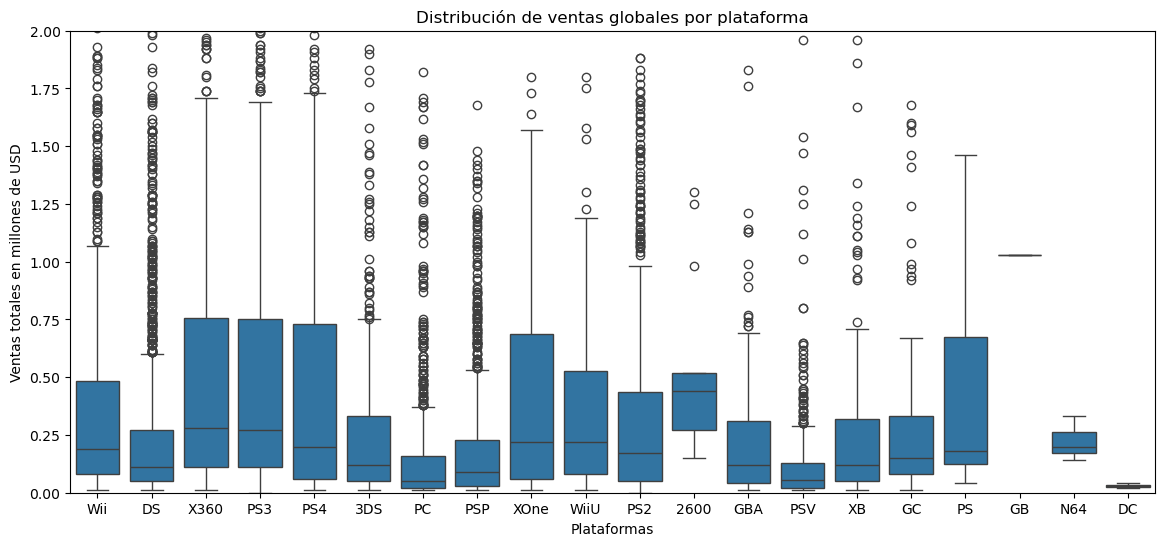

In [40]:
plt.figure(figsize=(14,6))
sns.boxplot(x='platform', y='total_sales', data=games_filtered)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Ventas totales en millones de USD')
plt.ylim(0, 2)
plt.show()

Se optó por limitar el eje Y para mejorar la visibilidad del diagrama, ya que algunas plataformas presentan valores de ventas extremadamente altos que podrían distorsionar la escala.

En el diagrama de caja se puede observar que casi todas las plataformas cuentan con valores atípicos altos, algunas más que otras; esto quiere decir que cuentan con juegos con ventas muy altas. Asimismo, hay plataformas cuyas cajas son amplias como Wii, X360, PS3, PS4, XOne, WiiU, PS2 y PS; esto quiere decir que sus valores son dispersos, los bigotes, al ser muy largos, indican mucha variabilidad y la mediana, al estar situada en la parte inferior de la caja, indica que tiene tendencia a valores altos. Por otra parte, hay plataformas con cajas más pequeñas como el DS, PC, PSV, N64, lo que indica una concentración mayor en torno a un rango medio de ventas. Finalmente, hay 2 plataformas (GB y DC) cuyas cajas son extremadamente pequeñas, dificultando su visibilidad. 

Las diferencias en ventas son significativas entre las plataformas; sin embargo, hay algunas que son similares como X360, PS3, PS4, XOne y PS. 

Las ventas promedio de varias plataformas pueden estar alteradas debido a la gran cantidad de valores atípicos, por lo que resultaría conveniente centrarse en la mediana.

### Correlación user_score y critic_score con ventas totales

Cómo las reseñas de los críticos afectan las ventas del PS4.

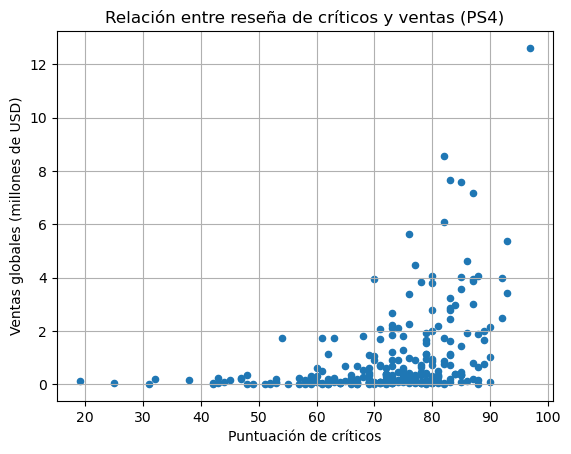

In [41]:
ps4_critic = games_filtered.query("platform == 'PS4'")

ps4_critic.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title('Relación entre reseña de críticos y ventas (PS4)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones de USD)')
plt.grid()
plt.show()

Cómo las reseñas de los usuarios afectan las ventas del PS4.

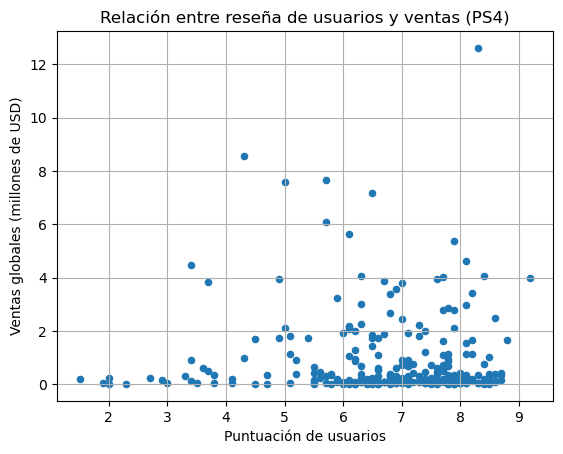

In [42]:
ps4_user = games_filtered.query("platform == 'PS4'")
ps4_user.plot(kind='scatter', x='user_score', y='total_sales')
plt.title('Relación entre reseña de usuarios y ventas (PS4)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones de USD)')
plt.grid()
plt.show()

Correlación de las reseñas de los usuarios y críticos con las ventas del PS4.

In [43]:
corr_user = ps4_user['user_score'].corr(ps4_user['total_sales'])
corr_critic = ps4_critic['critic_score'].corr(ps4_critic['total_sales'])
print(f'La correlación entre reseñas de usuarios y ventas es de: {corr_user}')
print(f'La correlación entre reseñas de críticos y ventas es de: {corr_critic}')

La correlación entre reseñas de usuarios y ventas es de: -0.031957110204556376
La correlación entre reseñas de críticos y ventas es de: 0.40656790206178095


La correlación entre las reseñas de los usuarios y ventas es ligeramente negativa, lo cual significa que podría no haber una relación significativa. En cambio, la correlación entre las reseñas de los críticos y las ventas es positiva moderada, lo cual indica que a mayor puntuación en las reseñas, mayores ventas.

### Comparar las ventas de los mismos juegos en otras plataformas.

In [44]:
ps4_games = games_filtered.query("platform == 'PS4'")
print('Hay', ps4_games['name'].nunique(), 'juegos para la plataforma PS4')

Hay 392 juegos para la plataforma PS4


In [45]:
ps4_names = ps4_games['name'].unique()
same_games_other_platforms = games_filtered[games_filtered['name'].isin(ps4_names)]
print(same_games_other_platforms.head())

                         name platform  year_of_release    genre  na_sales  \
16         Grand Theft Auto V      PS3             2013   Action      7.02   
23         Grand Theft Auto V     X360             2013   Action      9.66   
31  Call of Duty: Black Ops 3      PS4             2015  Shooter      6.03   
42         Grand Theft Auto V      PS4             2014   Action      3.96   
60       Call of Duty: Ghosts     X360             2013  Shooter      6.73   

    eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
16      9.09      0.98         3.96          97.0         8.2        M   
23      5.14      0.06         1.41          97.0         8.1        M   
31      5.86      0.36         2.38           NaN         NaN  Unknown   
42      6.31      0.38         1.97          97.0         8.3        M   
60      2.56      0.04         0.91          73.0         2.6        M   

    total_sales  
16        21.05  
23        16.27  
31        14.63  
42        12.6

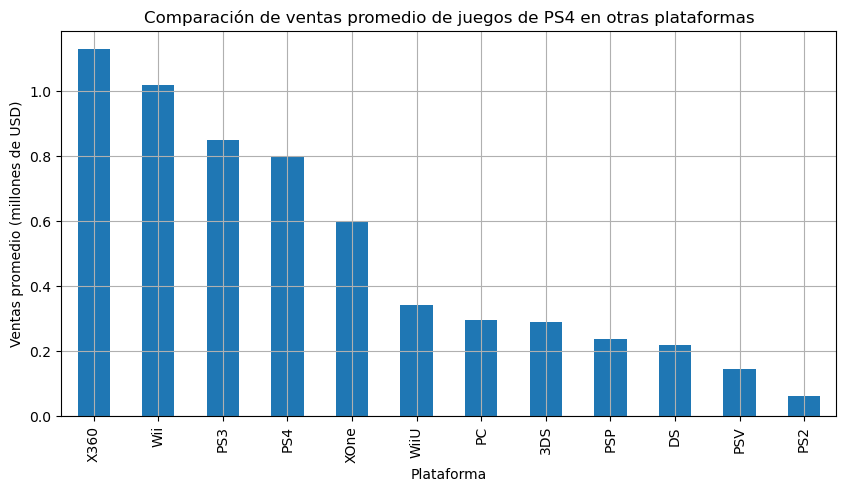

In [46]:
comparison_ps4 = same_games_other_platforms.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
comparison_ps4.plot(kind='bar', figsize=(10,5))
plt.title('Comparación de ventas promedio de juegos de PS4 en otras plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas promedio (millones de USD)')
plt.grid(True)
plt.show()

Se puede observar que los juegos disponibles para la plataforma PS4 registran ventas en otras plataformas como X360, Wii, PS3, XOne, WiiU, PC, etc. Cabe resaltar que la venta de dichos títulos de PS4 es similar a la del PS3 y mayor que en XOne. Sin embargo, los mismos títulos registran mejores ventas en X360 y Wii. En contraste, las versiones de los mismos juegos lanzadas para PC, 3DS, PSP, DS, PSV y PS2 registran ventas considerablemente menores.

En suma, las plataformas que registran menores ventas son aquellas portátiles (PSP, 3DS, DS) y las que registran mejores ventas son plataformas más complejas. 

### Distribución general de los juegos por género.

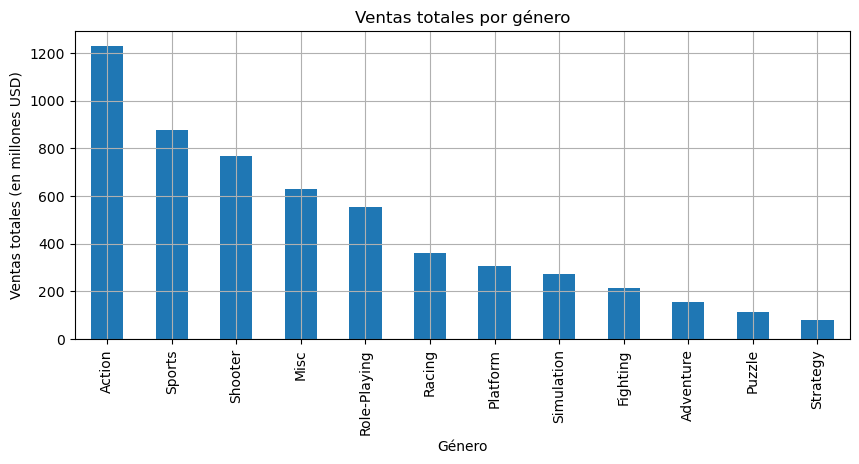

In [47]:
genre_sales = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(10, 4))
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones USD)')
plt.grid()
plt.show()

Se puede observar que los 3 géneros que más venden son los juegos de acción, deportes y disparos. En contraste, los géneros que menos vende son de estrategia, acertijos y aventura. 

# Paso 4. Crear un perfil de usuario para cada región

### Top 5 plataformas de cada región

In [48]:
na_top_platforms = games_filtered.groupby('platform')['na_sales'].sum().nlargest(5)
print("Top 5 plataformas de NA:", na_top_platforms)

Top 5 plataformas de NA: platform
X360    602.47
Wii     496.90
PS3     393.49
DS      374.07
PS2     211.41
Name: na_sales, dtype: float64


In [49]:
eu_top_platforms = games_filtered.groupby('platform')['eu_sales'].sum().nlargest(5)
print("Top 5 plataformas de EU:", eu_top_platforms)

Top 5 plataformas de EU: platform
PS3     330.29
X360    270.76
Wii     262.21
DS      184.96
PS4     141.09
Name: eu_sales, dtype: float64


In [50]:
jp_top_platforms = games_filtered.groupby('platform')['jp_sales'].sum().nlargest(5)
print("Top 5 plataformas de JP:", jp_top_platforms)

Top 5 plataformas de JP: platform
DS     171.90
3DS    100.67
PS3     80.19
PSP     74.75
Wii     69.33
Name: jp_sales, dtype: float64


In [51]:
plats_compare = pd.concat([na_top_platforms, eu_top_platforms, jp_top_platforms], axis=1)
plats_compare.columns = ['na_sales', 'eu_sales', 'jp_sales']
plats_compare = plats_compare.fillna(0)
plats_compare = plats_compare.sort_values('na_sales', ascending=False)
plats_compare

,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,0.00
Wii,496.90,262.21,69.33
PS3,393.49,330.29,80.19
DS,374.07,184.96,171.90
PS2,211.41,0.00,0.00
PS4,0.00,141.09,0.00
3DS,0.00,0.00,100.67
PSP,0.00,0.00,74.75


Se puede observar que las plataformas que pertenecen a este top y se repiten en las 3 regiones son: Wii, PS3 y DS.

Variaciones en las cuotas de mercado de una región a otra.

In [52]:
total_na = games_filtered['na_sales'].sum()
na_share = (na_top_platforms / total_na * 100).round(2)
print("\nCuotas de mercado NA (%):\n", na_share)


Cuotas de mercado NA (%):
 platform
X360    22.41
Wii     18.49
PS3     14.64
DS      13.92
PS2      7.87
Name: na_sales, dtype: float64


In [53]:
total_eu = games_filtered['eu_sales'].sum()
eu_share = (eu_top_platforms / total_eu * 100).round(2)
print("\nCuotas de mercado EU (%):\n", eu_share)


Cuotas de mercado EU (%):
 platform
PS3     20.12
X360    16.49
Wii     15.97
DS      11.27
PS4      8.59
Name: eu_sales, dtype: float64


In [54]:
total_jp = games_filtered['jp_sales'].sum()
jp_share = (jp_top_platforms / total_jp * 100).round(2)
print("\nCuotas de mercado JP (%):\n", jp_share)


Cuotas de mercado JP (%):
 platform
DS     27.62
3DS    16.18
PS3    12.89
PSP    12.01
Wii    11.14
Name: jp_sales, dtype: float64


In [55]:
platforms_compare = pd.concat([na_share, eu_share, jp_share], axis=1)
platforms_compare.columns = ['na_share_%', 'eu_share_%', 'jp_share_%']
platforms_compare = platforms_compare.fillna(0)
platforms_compare = platforms_compare.sort_values('na_share_%', ascending=False)
platforms_compare

,na_share_%,eu_share_%,jp_share_%
platform,,,
X360,22.41,16.49,0.00
Wii,18.49,15.97,11.14
PS3,14.64,20.12,12.89
DS,13.92,11.27,27.62
PS2,7.87,0.00,0.00
PS4,0.00,8.59,0.00
3DS,0.00,0.00,16.18
PSP,0.00,0.00,12.01


Se puede observar en la gráfica que en Norteamérica predominan las ventas del X360, seguidas por el Wii y el PS3. En cambio, en Europa predomina el PS3, seguido por el X360 y el Wii. Ambos mercados comparten plataformas del top 3 de ventas. Finalmente, en Japón predominan las ventas del DS, seguido por el 3DS y el PS3.

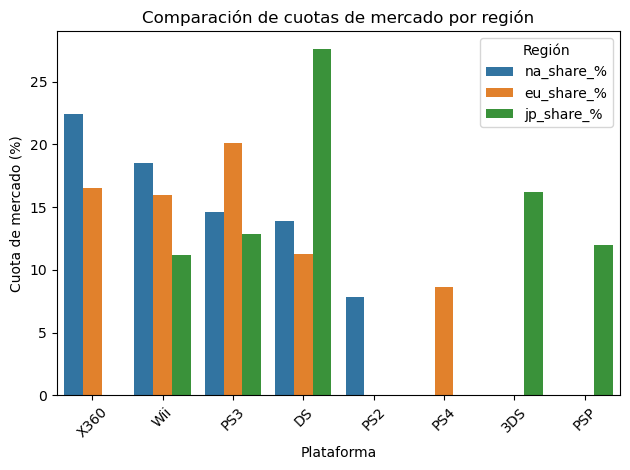

In [56]:
platforms_compare_reset = platforms_compare.reset_index()

sns.barplot(data=platforms_compare_reset.melt(id_vars='platform', var_name='Región', value_name='Cuota (%)'),
            x='platform', y='Cuota (%)', hue='Región')

plt.title('Comparación de cuotas de mercado por región')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado (%)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

En la gráfica se puede observar que del top 5 de plataformas de cada región, las 3 regiones comparten las plataformas Wii, PS3 y DS. Sin embargo, el Wii registra mayores ventas en Norteamérica, el PS3 en Europa y el DS en Japón. 
Por otra parte, hay plataformas que se encuentran en el top 5 de ciertas regiones, pero no en todas, como el X360 en Norteamérica y Europa, el PS2 en Norteamérica, el PS4 en Europa y el 3DS y PSP en Japón. 

Si se busca lanzar un juego a nivel mundial y que sea bien recibido por estas regiones, debería ser lanzado para las plataformas Wii, PS3 y DS.
Si se busca lanzar un juego específico para cada región, en Norteamérica debería ser lanzado en la plataforma X360, en Europa en PS3 y en Japón en DS.

### Top 5 géneros de cada región

In [57]:
na_top_genres = games_filtered.groupby('genre')['na_sales'].sum().nlargest(5)
print("Top 5 géneros de NA:", na_top_genres)

Top 5 géneros de NA: genre
Action          595.88
Sports          445.93
Shooter         408.37
Misc            319.52
Role-Playing    212.62
Name: na_sales, dtype: float64


In [58]:
eu_top_genres = games_filtered.groupby('genre')['eu_sales'].sum().nlargest(5)
print("Top 5 géneros de EU:", eu_top_genres)

Top 5 géneros de EU: genre
Action     380.72
Sports     271.07
Shooter    250.89
Misc       169.23
Racing     131.07
Name: eu_sales, dtype: float64


In [59]:
jp_top_genres = games_filtered.groupby('genre')['jp_sales'].sum().nlargest(5)
print("Top 5 géneros de JP:", jp_top_genres)

Top 5 géneros de JP: genre
Role-Playing    181.62
Action          109.68
Misc             73.58
Sports           53.12
Platform         36.44
Name: jp_sales, dtype: float64


In [60]:
genres_compare = pd.concat([na_top_genres, eu_top_genres, jp_top_genres], axis=1)
genres_compare.columns = ['na_sales', 'eu_sales', 'jp_sales']
genres_compare = genres_compare.fillna(0)
genres_compare = genres_compare.sort_values('na_sales', ascending=False)
genres_compare

,na_sales,eu_sales,jp_sales
genre,,,
Action,595.88,380.72,109.68
Sports,445.93,271.07,53.12
Shooter,408.37,250.89,0.00
Misc,319.52,169.23,73.58
Role-Playing,212.62,0.00,181.62
Racing,0.00,131.07,0.00
Platform,0.00,0.00,36.44


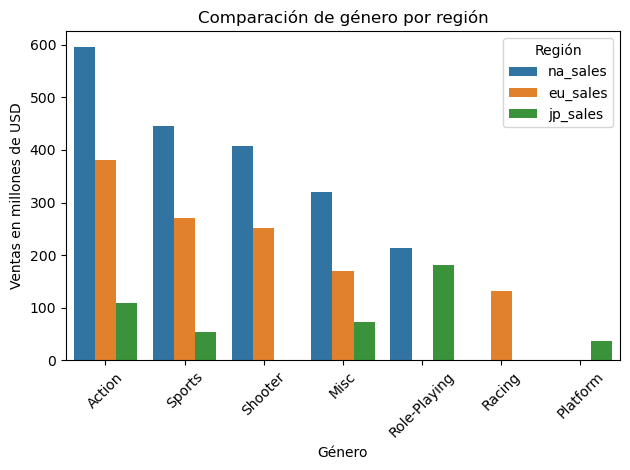

In [61]:
genres_compare_reset = genres_compare.reset_index()

sns.barplot(data=genres_compare_reset.melt(id_vars='genre', var_name='Región', value_name='ventas'),
            x='genre', y='ventas', hue='Región')

plt.title('Comparación de género por región')
plt.xlabel('Género')
plt.ylabel('Ventas en millones de USD')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

Se puede observar que los géneros con mayores ventas en las 3 regiones son: Action, Sports y Misc.

Tanto en Norteamérica como en Europa predominan las ventas del género Action, seguido de Sports, Shooter y Misc. En cambio, en Japón predominan las ventas del género Role-Playing, seguido de Action y Misc. Hay géneros que se encuentran en el top 5 de ciertas regiones, pero de otras no, como Role-playing que solo registra ventas en Norteamérica y Japón, Racing en Japón y Platform en Europa.

Si se busca lanzar un juego a nivel mundial y que sea bien recibido por estas regiones, debería ser de los géneros Action, Sports o Misc. En cambio, si se busca lanzar un juego por región, debería ser del género Action para Norteamérica y Europa, y Role-playing para Japón. 

### Clasificación ESRB y ventas en regiones individuales

In [62]:
na_rating_sales = games_filtered.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print("\nVentas por clasificación ESRB en NA:", na_rating_sales)


Ventas por clasificación ESRB en NA: rating
E          891.85
M          612.93
T          491.23
E10+       350.84
Unknown    338.33
EC           1.53
AO           1.26
RP           0.00
Name: na_sales, dtype: float64


In [63]:
eu_rating_sales = games_filtered.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print("\nVentas por clasificación ESRB en EU:", eu_rating_sales)


Ventas por clasificación ESRB en EU: rating
E          515.09
M          418.08
T          263.41
Unknown    257.10
E10+       187.09
AO           0.61
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64


In [64]:
jp_rating_sales = games_filtered.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print("\nVentas por clasificación ESRB en JP:", jp_rating_sales)


Ventas por clasificación ESRB en JP: rating
Unknown    296.84
E          147.48
T           92.02
M           46.89
E10+        39.05
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


In [65]:
ratings_compare = pd.concat([na_rating_sales, eu_rating_sales, jp_rating_sales], axis=1)
ratings_compare.columns = ['na_sales', 'eu_sales', 'jp_sales']
ratings_compare = ratings_compare.fillna(0)
ratings_compare = ratings_compare.sort_values('na_sales', ascending=False)
ratings_compare

,na_sales,eu_sales,jp_sales
rating,,,
E,891.85,515.09,147.48
M,612.93,418.08,46.89
T,491.23,263.41,92.02
E10+,350.84,187.09,39.05
Unknown,338.33,257.10,296.84
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


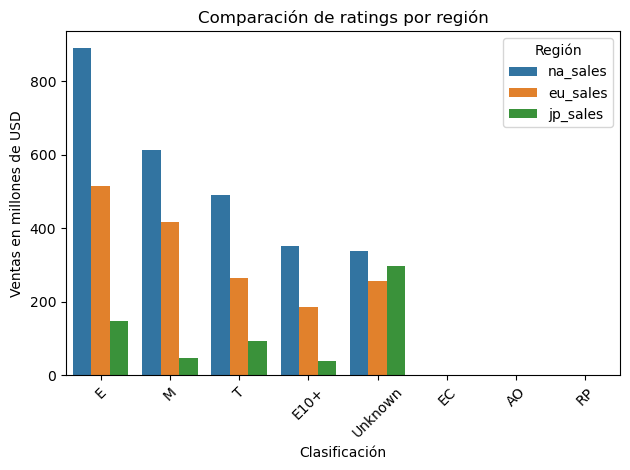

In [66]:
ratings_compare_reset = ratings_compare.reset_index()

sns.barplot(data=ratings_compare_reset.melt(id_vars='rating', var_name='Región', value_name='ventas'),
            x='rating', y='ventas', hue='Región')

plt.title('Comparación de ratings por región')
plt.xlabel('Clasificación')
plt.ylabel('Ventas en millones de USD')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

En la gráfica se puede observar que la clasificación "Unknown" se encuentra en el top 5 del rating por región; esta clasificación representa los valores ausentes del Dataset original, por lo que no será tomada en cuenta.

Las principales clasificaciones que se encuentran en el top 5 de las 3 regiones son "E", "M", "T" y "E10+". Las ventas por rating indican que si se busca lanzar un juego, ya sea a nivel regional o mundial, la clasificación idónea sería "E".

### Perfil de usuario para cada región

Después de analizar las ventas por plataforma, género y clasificación de los juegos:

El perfil de usuario para Norteamérica es:

*   Plataforma: X360
*   Género: Action
*   Rating: E


El perfil de usuario para Europa es:
*   Plataforma: PS3
*   Género: Action
*   Rating: E

El perfil de usuario para Europa es:
*   Plataforma: DS
*   Género: Role-playing
*   Rating: E

# Paso 5. Prueba de hipótesis

### Hipótesis 1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [67]:
xbox_scores = games[(games['platform'] == 'XOne') & games['user_score'].notna()]['user_score']
pc_scores = games[(games['platform'] == 'PC') & games['user_score'].notna()]['user_score']

alpha = 0.05
results = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones promedio son las mismas.")

Valor p: 4.935072360183576e-06
Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.


### Hipótesis 2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [68]:
action_scores = games[(games['genre'] == 'Action') & games['user_score'].notna()]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & games['user_score'].notna()]['user_score']

alpha = 0.05
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones promedio son iguales.")

Valor p: 0.11483818791498293
No podemos rechazar la hipótesis nula. Las calificaciones promedio son iguales.


La hipótesis nula usualmente se formula bajo la premisa de que algo es igual o similar, es decir, no representa un cambio. En contraste, la hipótesis alternativa implica un cambio o una diferencia con respecto a la hipótesis nula.

Para probar las hipótesis se utilizó la prueba ttest_ind ya que implica comparar la media de dos poblaciones distintas. Además, al no saber si tienen la misma varianza, se utiliza el método equal_var=Flase.

Como resultado se obtuvo que hay pruebas estadísticas suficientes para afirmar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Asimismo, no hay pruebas estadísticas suficientes para rechazar la hipótesis nula con respecto a las calificaciones promedio de los usuarios para los géneros Action y Sports, es decir, las calificaciones promedio podrían ser iguales.

# Paso 6. Conclusiones generales

La preparación de los datos fue una tarea compleja ya que había 3 columnas que representaban un problema para el análisis de los datos: "critic_score", "user_score" y "rating". Dichas columnas contenían alrededor del 50% de los datos ausentes, por lo que tenía que decidir qué hacer con ellos. Entre las opciones estaba: rellenarlos con la media o la mediana, crear otros datasets eliminando los valores ausentes de cada columna respectivamente o dejarlo así y emplear algún método en caso de que fueran a utilizarse en el análisis posterior. En el caso de la columna "rating", al ser una variable categórica, opté por rellenar los valores ausentes con "Unknown" para evitar ensuciar el data set y/o inflar alguna clasificación. Por otro lado, la columna "user_score" contenía el texto "TBD", es decir, To Be Determined; opté por cambiarlo a valor ausente. Finalmente, esta columna junto con "critic_score", al ser variables continuas, opté por dejarlas así ya que eran muchos los valores ausentes y, de ser necesario, recurrir al método .notna() en caso de utilizarlas para el análisis. 

Ahora bien, al analizar los datos noté que el dataset abarcaba del año 1980 hasta 2016; sin embargo, de 1980 a 1993 el registro de juegos lanzados era muy bajo. Éste incrementa a partir de 1994, pero su crecimiento es significativo a partir de 2001-2002. También observé las ventas de las 31 plataformas que componen el dataset e identifiqué las que más ventas registran (PS2, X360, PS3, etc.). Asimismo, noté que hay plataformas que registran ventas por periodos largos de tiempo (como 2600, PC y DS).

Para poder analizar los datos y crear una campaña para el 2017, tomé en cuenta los datos a partir del 2005. Esto con la finalidad de estudiar las tendencias de las consolas/plataformas más recientes y analizar su comportamiento en el mercado.

Una vez filtrados los datos con ese año, pude observar que las plataformas con mayores ventas recientes, de las cuales algunas disminuían sus registros (como PS2), ya que eran sustituidas por su versión más reciente (PS3 y posteriormente PS4). Cabe remarcar que las plataformas potencialmente rentables son PC, 3DS, XOne y PS4, pues se mantienen activas al cierre de 2016, a diferencia de otras que ya muestran un ciclo descendente o han dejado de tener actividad. Al generar un diagrama de caja con las plataformas que registran ventas del 2005 en adelante, observé que las diferencias en ventas son significativas entre las plataformas; sin embargo, hay algunas que son similares como X360, PS3, PS4, XOne y PS. 

Por otra parte, identifiqué que para los juegos del PS4 la correlación entre las reseñas de los usuarios y ventas es ligeramente negativa, lo cual significa que podría no haber una relación significativa. En cambio, la correlación entre las reseñas de los críticos y las ventas es positiva moderada, lo cual indica que a mayor puntuación en las reseñas, mayores ventas. Asimismo, los juegos disponibles para la plataforma PS4 registran ventas en otras plataformas como X360, Wii, PS3, XOne, WiiU, PC, etc. Cabe resaltar que la venta de dichos títulos de PS4 es similar a la del PS3 y mayor que en XOne. Sin embargo, los mismos títulos registran mejores ventas en X360 y Wii. En otro orden de ideas, al crear un gráfico de barras para revisar la distribución general de los juegos por género, observé que los 3 géneros que más venden son los de acción, deportes y disparos. En contraste, los géneros que menos venden son de estrategia, acertijos y aventura.

Finalmente, para crear un perfil de usuario para cada región analicé el top 5 de plataformas, top 5 de géneros y top 5 de clasificación ESRB por cada región. Obtuve que el perfil de usuario por región es:

El perfil de usuario para Norteamérica es:
*   Plataforma: X360
*   Género: Action
*   Rating: E

El perfil de usuario para Europa es:
*   Plataforma: PS3
*   Género: Action
*   Rating: E

El perfil de usuario para Europa es:
*   Plataforma: DS
*   Género: Role-playing
*   Rating: E

En las pruebas de hipótesis obtuve que hay pruebas estadísticas suficientes para afirmar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Asimismo, no hay pruebas estadísticas suficientes para rechazar la hipótesis nula con respecto a las calificaciones promedio de los usuarios para los géneros Action y Sports, es decir, las calificaciones promedio podrían ser iguales.